In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


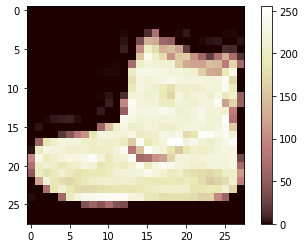

Answer: 9


In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='pink')
plt.colorbar()
plt.show()
# answer
print("Answer:",train_Y[0])

In [6]:
# before data normalization
print(train_X[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

Min-Max Normalization: 모든 feature에 대해 0~1사이의 값으로 변환
(X-min)/(MAX-MIN) = X/255

In [4]:
# After Normalization
train_X = train_X/255.0
test_X = test_X/255.0
print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [8]:
train_X[0].shape

(28, 28)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
# Adam의 기본값: learning rate = 0.0001
# 희소행렬을 나타내는 데이터를 전처리 없이 정답행렬로 사용가능.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25,
                   callbacks=[tf.keras.callbacks.EarlyStopping
                              (patience=5, monitor='val_loss')])

Epoch 1/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2970 - accuracy: 0.8930 - val_loss: 0.3496 - val_accuracy: 0.8766
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8941 - val_loss: 0.3478 - val_accuracy: 0.8763
Epoch 3/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.8933 - val_loss: 0.3507 - val_accuracy: 0.8755
Epoch 4/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2935 - accuracy: 0.8934 - val_loss: 0.3454 - val_accuracy: 0.8777
Epoch 5/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.8952 - val_loss: 0.3494 - val_accuracy: 0.8773
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.8949 - val_loss: 0.3528 - val_accuracy: 0.8767
Epoch 7/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2895 - accuracy: 0.8958 - val_loss: 0.3441 - val_accuracy:

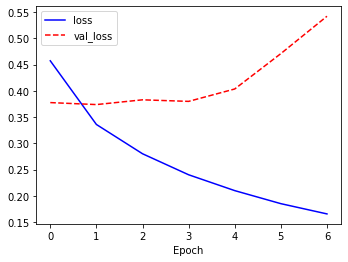

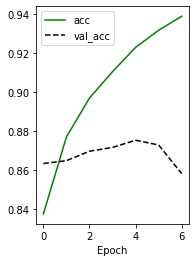

In [13]:
# 정확도 및 손실값에 대한 결과 시각화
# 검증데이터와 학습데이터 비교
# 과적합 혹은 과소적합 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'g-',label='acc')
plt.plot(history.history['val_accuracy'],'k--',label='val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
# Evaluate
model.evaluate(test_X,test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.5667 - accuracy: 0.8528


[0.5666502118110657, 0.8528000116348267]

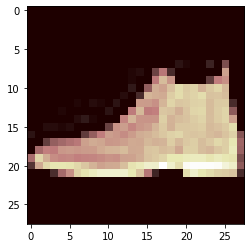

In [ ]:
# 예측
pred_X = model.predict(test_X[[0]])
plt.imshow(test_X[0], cmap='pink')
plt.show()

In [ ]:
print(pred_X+1)
print("예측 수행 범주 : ", test_Y[1])
print(pred_X.shape)

[[1.0000005 1.        1.0000001 1.        1.        1.0019882 1.0000001
  1.0066472 1.0000001 1.9913636]]
예측 수행 범주 :  2
(1, 10)


In [5]:
# Convolution layer만을 활용했을 때
print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


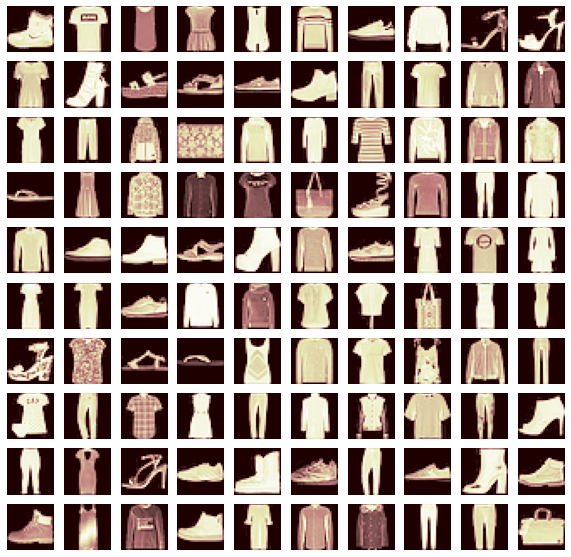

[9 0 0 3 0 2 7 2 5 5]
[0 9 5 5 7 9 1 0 6 4]
[3 1 4 8 4 3 0 2 4 4]
[5 3 6 6 0 8 5 2 1 6]
[6 7 9 5 9 2 7 3 0 3]
[3 3 7 2 2 6 6 8 3 3]
[5 0 5 5 0 2 0 0 4 1]
[3 1 6 3 1 4 4 6 1 9]
[1 3 5 7 9 7 1 7 9 9]
[9 3 2 9 3 6 4 1 1 8]


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis("off")
    plt.imshow(train_X[i].reshape(28,28), cmap='pink')
    
plt.show()
for i in range(0,100,10):
    print(train_Y[i:i+10])

In [10]:
# Pooling layer 없이 Convolution layer만 활용
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
                          filters=16, strides=(1,1), padding='valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [12]:
history = model.fit(train_X, train_Y,
                   epochs=500,
                   validation_split = 0.25,
                   callbacks=[tf.keras.callbacks.EarlyStopping
                             (patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 13s 9ms/step - loss: 0.4574 - accuracy: 0.8373 - val_loss: 0.3777 - val_accuracy: 0.8633
Epoch 2/500
1407/1407 [==============================] - 12s 9ms/step - loss: 0.3360 - accuracy: 0.8769 - val_loss: 0.3739 - val_accuracy: 0.8647
Epoch 3/500
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2802 - accuracy: 0.8970 - val_loss: 0.3830 - val_accuracy: 0.8696
Epoch 4/500
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2402 - accuracy: 0.9105 - val_loss: 0.3800 - val_accuracy: 0.8715
Epoch 5/500
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2100 - accuracy: 0.9230 - val_loss: 0.4037 - val_accuracy: 0.8753
Epoch 6/500
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1851 - accuracy: 0.9318 - val_loss: 0.4711 - val_accuracy: 0.8728
Epoch 7/500
1407/1407 [==============================] - 12s 9ms/step - loss: 0.1656 - accuracy: 0.9391 - val_loss: 0.5423 -

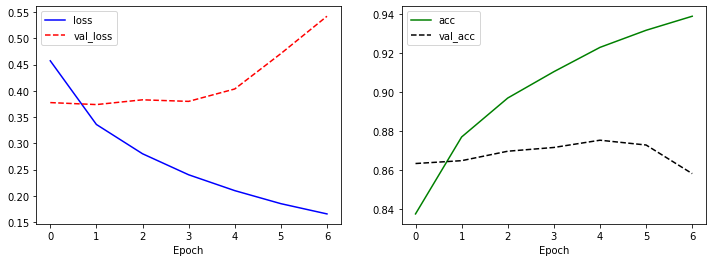

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'acc')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.5667 - accuracy: 0.8528


[0.5666502118110657, 0.8528000116348267]

In [ ]:
# Apply Convolution layor, Pooling, Dropout
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides= (2,2), pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.AvgPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=10, activation = 'softmax')
])
# maxpool: tf.keras.layers.MaxPool2D()
# strides: 건너뛰기, pool_size: default:(2,2)
# averagepool: tf.keras.layers.AveragePool2D()
# Dropout Layer 생성: tf.keras.layers.Dropout()
# -rate: 이전 계층에서 제외할 뉴런의 비율 설정

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
history = model.fit(train_X, train_Y,
                   epochs=500,
                   validation_split = 0.25,
                   callbacks=[tf.keras.callbacks.EarlyStopping
                             (patience=5, monitor='val_loss')])

Epoch 1/500
1407/1407 [==============================] - 17s 12ms/step - loss: 0.5659 - accuracy: 0.7935 - val_loss: 0.4419 - val_accuracy: 0.8345
Epoch 2/500
1407/1407 [==============================] - 17s 12ms/step - loss: 0.4110 - accuracy: 0.8523 - val_loss: 0.3665 - val_accuracy: 0.8694
Epoch 3/500
1407/1407 [==============================] - 17s 12ms/step - loss: 0.3677 - accuracy: 0.8676 - val_loss: 0.3569 - val_accuracy: 0.8708
Epoch 4/500
1407/1407 [==============================] - 17s 12ms/step - loss: 0.3464 - accuracy: 0.8778 - val_loss: 0.3399 - val_accuracy: 0.8799
Epoch 5/500
1407/1407 [==============================] - 17s 12ms/step - loss: 0.3300 - accuracy: 0.8803 - val_loss: 0.3147 - val_accuracy: 0.8875
Epoch 6/500
1407/1407 [==============================] - 17s 12ms/step - loss: 0.3147 - accuracy: 0.8862 - val_loss: 0.3093 - val_accuracy: 0.8859
Epoch 7/500
1407/1407 [==============================] - 17s 12ms/step - loss: 0.3025 - accuracy: 0.8908 - val_loss: 0

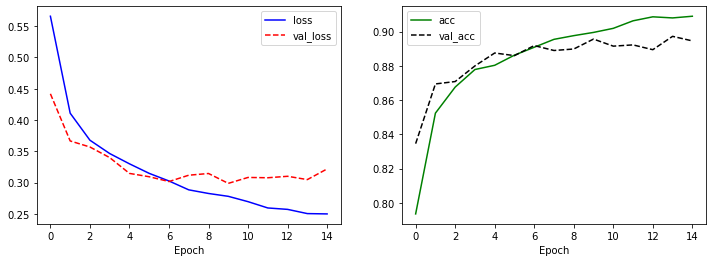

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'acc')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3319 - accuracy: 0.8898


[0.33192598819732666, 0.8898000121116638]

In [17]:
# Apply VGGNet
# Conv/Pool -> Conv/Pool 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3),filters=32,
                          padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=64,
                          padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides= (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               6423040   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [19]:
history = model.fit(train_X, train_Y,
                   epochs = 500,
                   validation_split = 0.25,
                   callbacks = [tf.keras.callbacks.EarlyStopping
                               (patience = 5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 15s 11ms/step - loss: 0.4873 - accuracy: 0.8282 - val_loss: 0.2849 - val_accuracy: 0.8949
Epoch 2/500
1407/1407 [==============================] - 15s 10ms/step - loss: 0.3215 - accuracy: 0.8855 - val_loss: 0.2611 - val_accuracy: 0.9035
Epoch 3/500
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2746 - accuracy: 0.9000 - val_loss: 0.2468 - val_accuracy: 0.9068
Epoch 4/500
1407/1407 [==============================] - 15s 10ms/step - loss: 0.2497 - accuracy: 0.9094 - val_loss: 0.2304 - val_accuracy: 0.9181
Epoch 5/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2263 - accuracy: 0.9186 - val_loss: 0.2271 - val_accuracy: 0.9157
Epoch 6/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2053 - accuracy: 0.9240 - val_loss: 0.2155 - val_accuracy: 0.9230
Epoch 7/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1920 - accuracy: 0.9297 - val_loss: 0

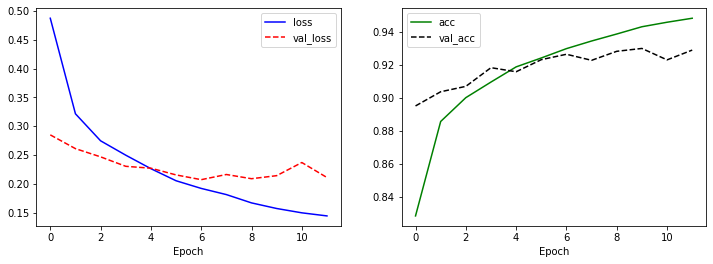

In [20]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'acc')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [21]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 5ms/step - loss: 0.2374 - accuracy: 0.9258


[0.2373575121164322, 0.9258000254631042]

In [6]:
# Apply VGGNet + Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10, # 이미지 회전값
    zoom_range = 0.10, # 이미지 일부 확대
    shear_range = 0.5, # 이미지 기울기
    width_shift_range = 0.10, # 좌우이동
    height_shift_range = 0.10, # 상하이동
    horizontal_flip = True, # 이미지 가로 뒤집기
    vertical_flip = False # 이미지 세로 뒤집기
)

In [7]:
augment_size = 100 # 한번에 생성할 이미지의 수
# np.tile(): A를 reps에 정해진 횟수만큼 반복
x_augment = image_generator.flow(x = np.tile(A = train_X[0].reshape(28*28),
                                    reps=100).reshape(-1,28,28,1),
                                y = np.zeros(augment_size), # label값은 zero
                                batch_size = augment_size,
                                shuffle = False).next()[0] # 실제 값을 꺼내는 next()

x_augment_1 = image_generator.flow(x = x_augment,
                                   y = np.zeros(augment_size),
                                   batch_size = augment_size,
                                   shuffle = False).next()[1]

# flow(): 실제 보강된 이미지를 생성하는 함수-> Iterator 객체 생성 후 순서대로 값을 꺼낼 수 있음.
# next를 사용하여 꺼낼 수 있고, 보강된 이미지들이 첫 번째에 위치해 있기 때문에 [0]을 할당하여 꺼내주고, 한번에 꺼내는 이미지는 100장

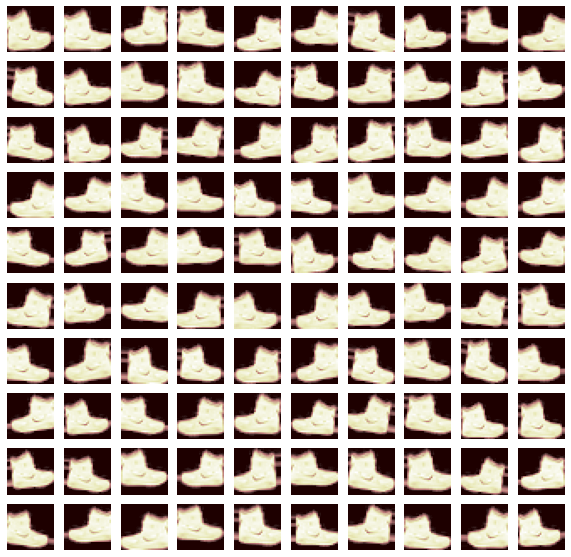

In [8]:
# Augmentation
plt.figure(figsize = (10,10))
for i in range(0,100):
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.imshow(x_augment[i].reshape(28, 28), cmap = 'pink')
plt.show()

In [10]:
# 이미지 추가 생성
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)
augment_size = 30000

# 원본 이미지 무작위 선택 및 데이터 복사
x_choice = np.random.choice(train_X.shape[0], size = augment_size, replace = False)
x_augmented = train_X[x_choice].copy()
y_augmented = train_Y[x_choice].copy()

# 이미지를 변형할 원본 이미지를 찾기 위한 함수 예제
print(np.random.randint(train_X.shape[0], size = augment_size))
print(np.random.choice(train_X.shape[0], size = augment_size, replace = False))

[42056 32174 11674 ... 49535 57019  6141]
[ 7053 54616 43008 ... 43882 59639 18197]


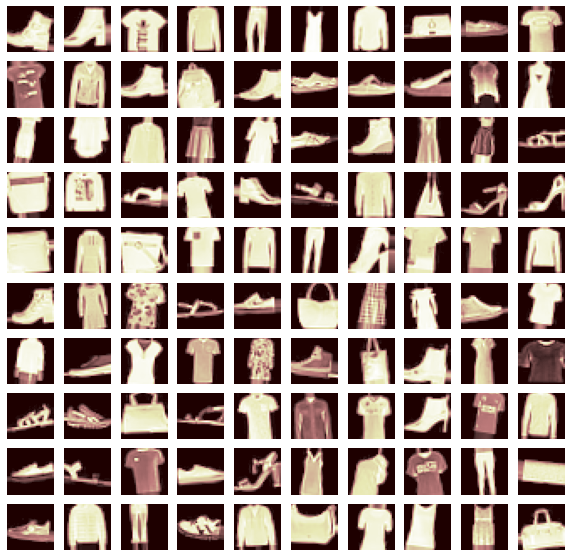

In [11]:
# 보강 이미지 생성
x_augmented = image_generator.flow(x = x_augmented,
                                   y = np.zeros(augment_size),
                                   batch_size = augment_size,
                                   shuffle = False).next()[0]

plt.figure(figsize = (10,10))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.imshow(x_augmented[i].reshape(28, 28), cmap = 'pink')
plt.show()

In [12]:
# 데이터 합치기
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size = (3,3),
                           filters = 32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size = 32,
                           filters = 64, padding = 'same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 128, padding='same', activation = 'relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 256, padding = 'valid', activation = 'relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation= 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

In [17]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        2097216   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)         0

In [22]:
history = model.fit(train_X, train_Y, epochs = 500, validation_split = 0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10, monitor = 'val_loss')])

Epoch 1/500
2110/2110 [==============================] - 26s 13ms/step - loss: 0.2427 - accuracy: 0.9172 - val_loss: 0.5315 - val_accuracy: 0.8043
Epoch 2/500
2110/2110 [==============================] - 26s 13ms/step - loss: 0.2492 - accuracy: 0.9157 - val_loss: 0.5705 - val_accuracy: 0.7956
Epoch 3/500
2110/2110 [==============================] - 26s 12ms/step - loss: 0.2456 - accuracy: 0.9168 - val_loss: 0.5429 - val_accuracy: 0.7974
Epoch 4/500
2110/2110 [==============================] - 26s 13ms/step - loss: 0.2334 - accuracy: 0.9197 - val_loss: 0.5156 - val_accuracy: 0.8160
Epoch 5/500
2110/2110 [==============================] - 26s 13ms/step - loss: 0.2360 - accuracy: 0.9200 - val_loss: 0.5626 - val_accuracy: 0.7941
Epoch 6/500
2110/2110 [==============================] - 26s 13ms/step - loss: 0.2340 - accuracy: 0.9211 - val_loss: 0.5527 - val_accuracy: 0.7991
Epoch 7/500
2110/2110 [==============================] - 26s 13ms/step - loss: 0.2400 - accuracy: 0.9212 - val_loss: 0

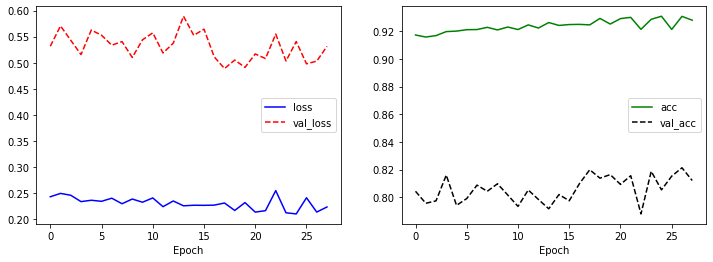

In [23]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label = 'acc')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_acc')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [24]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 5ms/step - loss: 0.3097 - accuracy: 0.9026


[0.3097270429134369, 0.9025999903678894]